# Mini Project #2: Absenteeism in the workplace


# Business Question: Can we predict employee absenteeism?

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.colors as mcolors

plt.style.use('fivethirtyeight')

from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score

from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.image as pltimg
from pylab import rcParams

from numpy import loadtxt
from xgboost import XGBClassifier

## Data dictionary

Records of absenteeism at work from July 2007 to July 2010

1. ID: Individual identification 
2. Reason: International Code of Diseases (ICD) recognised illness = 1, Non-recognised illness = 0 
3. Month: Month of absence
4. Day: Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
5. Seasons:  (summer (1), autumn (2), winter (3), spring (4))
6. Transport_expense: Transportation expense
7. Distance_to_work: Distance from Residence to Work (kilometers)
8. Service_time: Service time
9. Age
10. Avg_workload_day: Work load Average/day (hours)
11. Target: Hit target
12. Disc_fail: Disciplinary failure (yes=1; no=0)
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
14. Children: (number of children)
15. Social_drinker: (yes=1; no=0)
16. Social_smoker: (yes=1; no=0)
17. Pet: (number of pet)
18. Weight
19. Height
20. BMI: Body mass index
21. Absenteeism: time in hours (target), total over three year period

## Importing the data

In [138]:
data = pd.read_csv('C:/Users/carls/OneDrive/Desktop/MiniProject_2/Own/Absenteeism_at_work.csv',delimiter= ';', index_col = 'ID')

In [139]:
#renaming columns to shorter/simpler headings, see data dictionary above for details.
data.rename(columns={'Reason for absence': 'Illness', 
    'Month of absence': 'Month', 
    'Day of the week': 'Day',
    'Transportation expense': 'Transport_expense', 
    'Distance from Residence to Work': 'Distance_to_work',
    'Service time': 'Service_time', 
    'Work load Average/day ': 'Avg_workload', 
    'Hit target': 'Target',
    'Disciplinary failure': 'Disc_fail', 
    'Son': 'Children', 
    'Social drinker': 'Social_drinker',
    'Social smoker': 'Social_smoker',  
    'Body mass index': 'BMI',
    'Absenteeism time in hours': 'Absenteeism'}, inplace = True)

In [140]:
data.shape

(740, 20)

In [141]:
data.head()

Illness  Month  Day  Seasons  Transport_expense  Distance_to_work  \
ID                                                                      
11       26      7    3        1                289                36   
36        0      7    3        1                118                13   
3        23      7    4        1                179                51   
7         7      7    5        1                279                 5   
11       23      7    5        1                289                36   

    Service_time  Age  Avg_workload  Target  Disc_fail  Education  Children  \
ID                                                                            
11            13   33       239.554      97          0          1         2   
36            18   50       239.554      97          1          1         1   
3             18   38       239.554      97          0          1         0   
7             14   39       239.554      97          0          1         2   
11            13   33       239.554      97          0          1         2   

    Social_drinker  Social_smoker  Pet  Weight  Height  BMI  Absenteeism  
ID                                                                        
11               1              0    1      90     172   30            4  
36               1              0    0      98     178   31            0  
3                1              0    0      89     170   31            2  
7                1              1    0      68     168   24            4  
11               1              0    1      90     172   30            2

In [142]:
data.tail()

Illness  Month  Day  Seasons  Transport_expense  Distance_to_work  \
ID                                                                      
11       14      7    3        1                289                36   
1        11      7    3        1                235                11   
4         0      0    3        1                118                14   
8         0      0    4        2                231                35   
35        0      0    6        3                179                45   

    Service_time  Age  Avg_workload  Target  Disc_fail  Education  Children  \
ID                                                                            
11            13   33       264.604      93          0          1         2   
1             14   37       264.604      93          0          3         1   
4             13   40       271.219      95          0          1         1   
8             14   39       271.219      95          0          1         2   
35            14   53       271.219      95          0          1         1   

    Social_drinker  Social_smoker  Pet  Weight  Height  BMI  Absenteeism  
ID                                                                        
11               1              0    1      90     172   30            8  
1                0              0    1      88     172   29            4  
4                1              0    8      98     170   34            0  
8                1              0    2     100     170   35            0  
35               0              0    1      77     175   25            0

In [143]:
data.columns

Index(['Illness', 'Month', 'Day', 'Seasons', 'Transport_expense',
       'Distance_to_work', 'Service_time', 'Age', 'Avg_workload', 'Target',
       'Disc_fail', 'Education', 'Children', 'Social_drinker', 'Social_smoker',
       'Pet', 'Weight', 'Height', 'BMI', 'Absenteeism'],
      dtype='object')

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 11 to 35
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Illness            740 non-null    int64  
 1   Month              740 non-null    int64  
 2   Day                740 non-null    int64  
 3   Seasons            740 non-null    int64  
 4   Transport_expense  740 non-null    int64  
 5   Distance_to_work   740 non-null    int64  
 6   Service_time       740 non-null    int64  
 7   Age                740 non-null    int64  
 8   Avg_workload       740 non-null    float64
 9   Target             740 non-null    int64  
 10  Disc_fail          740 non-null    int64  
 11  Education          740 non-null    int64  
 12  Children           740 non-null    int64  
 13  Social_drinker     740 non-null    int64  
 14  Social_smoker      740 non-null    int64  
 15  Pet                740 non-null    int64  
 16  Weight             740 non

In [145]:
data.isnull().sum()

Illness              0
Month                0
Day                  0
Seasons              0
Transport_expense    0
Distance_to_work     0
Service_time         0
Age                  0
Avg_workload         0
Target               0
Disc_fail            0
Education            0
Children             0
Social_drinker       0
Social_smoker        0
Pet                  0
Weight               0
Height               0
BMI                  0
Absenteeism          0
dtype: int64

## Feature engineering

In [146]:
# Changing workload to hours (from minutes) for ease of understanding
data.Avg_workload = data.Avg_workload.apply(lambda x : x/60)
data

Illness  Month  Day  Seasons  Transport_expense  Distance_to_work  \
ID                                                                      
11       26      7    3        1                289                36   
36        0      7    3        1                118                13   
3        23      7    4        1                179                51   
7         7      7    5        1                279                 5   
11       23      7    5        1                289                36   
..      ...    ...  ...      ...                ...               ...   
11       14      7    3        1                289                36   
1        11      7    3        1                235                11   
4         0      0    3        1                118                14   
8         0      0    4        2                231                35   
35        0      0    6        3                179                45   

    Service_time  Age  Avg_workload  Target  Disc_fail  Education  Children  \
ID                                                                            
11            13   33      3.992567      97          0          1         2   
36            18   50      3.992567      97          1          1         1   
3             18   38      3.992567      97          0          1         0   
7             14   39      3.992567      97          0          1         2   
11            13   33      3.992567      97          0          1         2   
..           ...  ...           ...     ...        ...        ...       ...   
11            13   33      4.410067      93          0          1         2   
1             14   37      4.410067      93          0          3         1   
4             13   40      4.520317      95          0          1         1   
8             14   39      4.520317      95          0          1         2   
35            14   53      4.520317      95          0          1         1   

    Social_drinker  Social_smoker  Pet  Weight  Height  BMI  Absenteeism  
ID                                                                        
11               1              0    1      90     172   30            4  
36               1              0    0      98     178   31            0  
3                1              0    0      89     170   31            2  
7                1              1    0      68     168   24            4  
11               1              0    1      90     172   30            2  
..             ...            ...  ...     ...     ...  ...          ...  
11               1              0    1      90     172   30            8  
1                0              0    1      88     172   29            4  
4                1              0    8      98     170   34            0  
8                1              0    2     100     170   35            0  
35               0              0    1      77     175   25            0  

[740 rows x 20 columns]

In [147]:
#Splitting data into two groups (1 = recognised illness, 0 = not recognised illness)

mask_good = data.Illness <= 0
data.loc[mask_good, 'Illness'] = 0
mask_bad = data.Absenteeism > 1
data.loc[mask_bad, 'Illness'] = 1

data.head()

Illness  Month  Day  Seasons  Transport_expense  Distance_to_work  \
ID                                                                      
11        1      7    3        1                289                36   
36        0      7    3        1                118                13   
3         1      7    4        1                179                51   
7         1      7    5        1                279                 5   
11        1      7    5        1                289                36   

    Service_time  Age  Avg_workload  Target  Disc_fail  Education  Children  \
ID                                                                            
11            13   33      3.992567      97          0          1         2   
36            18   50      3.992567      97          1          1         1   
3             18   38      3.992567      97          0          1         0   
7             14   39      3.992567      97          0          1         2   
11            13   33      3.992567      97          0          1         2   

    Social_drinker  Social_smoker  Pet  Weight  Height  BMI  Absenteeism  
ID                                                                        
11               1              0    1      90     172   30            4  
36               1              0    0      98     178   31            0  
3                1              0    0      89     170   31            2  
7                1              1    0      68     168   24            4  
11               1              0    1      90     172   30            2

## Feature correlations 

In [148]:
corr_all = data.corr()
corr_all

Illness     Month       Day   Seasons  Transport_expense  \
Illness            1.000000  0.092976 -0.004736  0.052822          -0.092464   
Month              0.092976  1.000000 -0.006528  0.407770           0.137525   
Day               -0.004736 -0.006528  1.000000  0.046493           0.033988   
Seasons            0.052822  0.407770  0.046493  1.000000           0.036995   
Transport_expense -0.092464  0.137525  0.033988  0.036995           1.000000   
Distance_to_work  -0.003500 -0.003887  0.118026 -0.063108           0.262183   
Service_time       0.071048 -0.062862  0.021252 -0.010904          -0.349887   
Age                0.063760 -0.001520  0.004459 -0.012089          -0.227542   
Avg_workload       0.071202 -0.169989  0.015646  0.150439           0.005438   
Target            -0.072805 -0.460453  0.030986 -0.061154          -0.080193   
Disc_fail         -0.115049  0.107946 -0.015120  0.151766           0.109222   
Education         -0.035121 -0.066128  0.058516 -0.002951          -0.055065   
Children          -0.096722  0.079031  0.098079  0.046950           0.383001   
Social_drinker     0.011428  0.056226  0.041772 -0.045982           0.145117   
Social_smoker     -0.050436 -0.038603  0.013156 -0.048671           0.044356   
Pet               -0.020309  0.047787 -0.028885  0.012356           0.400080   
Weight             0.056908  0.023278 -0.128980 -0.026278          -0.207435   
Height             0.004384 -0.068942 -0.082133 -0.033737          -0.194496   
BMI                0.055725  0.051046 -0.103578 -0.011031          -0.136517   
Absenteeism       -0.152947  0.024345 -0.124361 -0.005615           0.027585   

                   Distance_to_work  Service_time       Age  Avg_workload  \
Illness                   -0.003500      0.071048  0.063760      0.071202   
Month                     -0.003887     -0.062862 -0.001520     -0.169989   
Day                        0.118026      0.021252  0.004459      0.015646   
Seasons                   -0.063108     -0.010904 -0.012089      0.150439   
Transport_expense          0.262183     -0.349887 -0.227542      0.005438   
Distance_to_work           1.000000      0.131730 -0.145886     -0.068677   
Service_time               0.131730      1.000000  0.670979     -0.000668   
Age                       -0.145886      0.670979  1.000000     -0.039425   
Avg_workload              -0.068677     -0.000668 -0.039425      1.000000   
Target                    -0.013865     -0.007840 -0.039224     -0.089445   
Disc_fail                 -0.056527     -0.000221  0.104304      0.029026   
Education                 -0.259605     -0.213000 -0.221882     -0.074960   
Children                   0.054230     -0.047128  0.056984      0.027820   
Social_drinker             0.452196      0.353141  0.213183     -0.033713   
Social_smoker             -0.075369      0.072424  0.121738      0.030968   
Pet                        0.205941     -0.440301 -0.231226      0.007114   
Weight                    -0.047859      0.455975  0.418730     -0.038522   
Height                    -0.353372     -0.053135 -0.062997      0.103315   
BMI                        0.113772      0.499718  0.470688     -0.090709   
Absenteeism               -0.088363      0.019029  0.065760      0.024749   

                     Target  Disc_fail  Education  Children  Social_drinker  \
Illness           -0.072805  -0.115049  -0.035121 -0.096722        0.011428   
Month             -0.460453   0.107946  -0.066128  0.079031        0.056226   
Day                0.030986  -0.015120   0.058516  0.098079        0.041772   
Seasons           -0.061154   0.151766  -0.002951  0.046950       -0.045982   
Transport_expense -0.080193   0.109222  -0.055065  0.383001        0.145117   
Distance_to_work  -0.013865  -0.056527  -0.259605  0.054230        0.452196   
Service_time      -0.007840  -0.000221  -0.213000 -0.047128        0.353141   
Age               -0.039224   0.104304  -0.221882  0.056984        0.213183   
Avg_worklo

<AxesSubplot:>

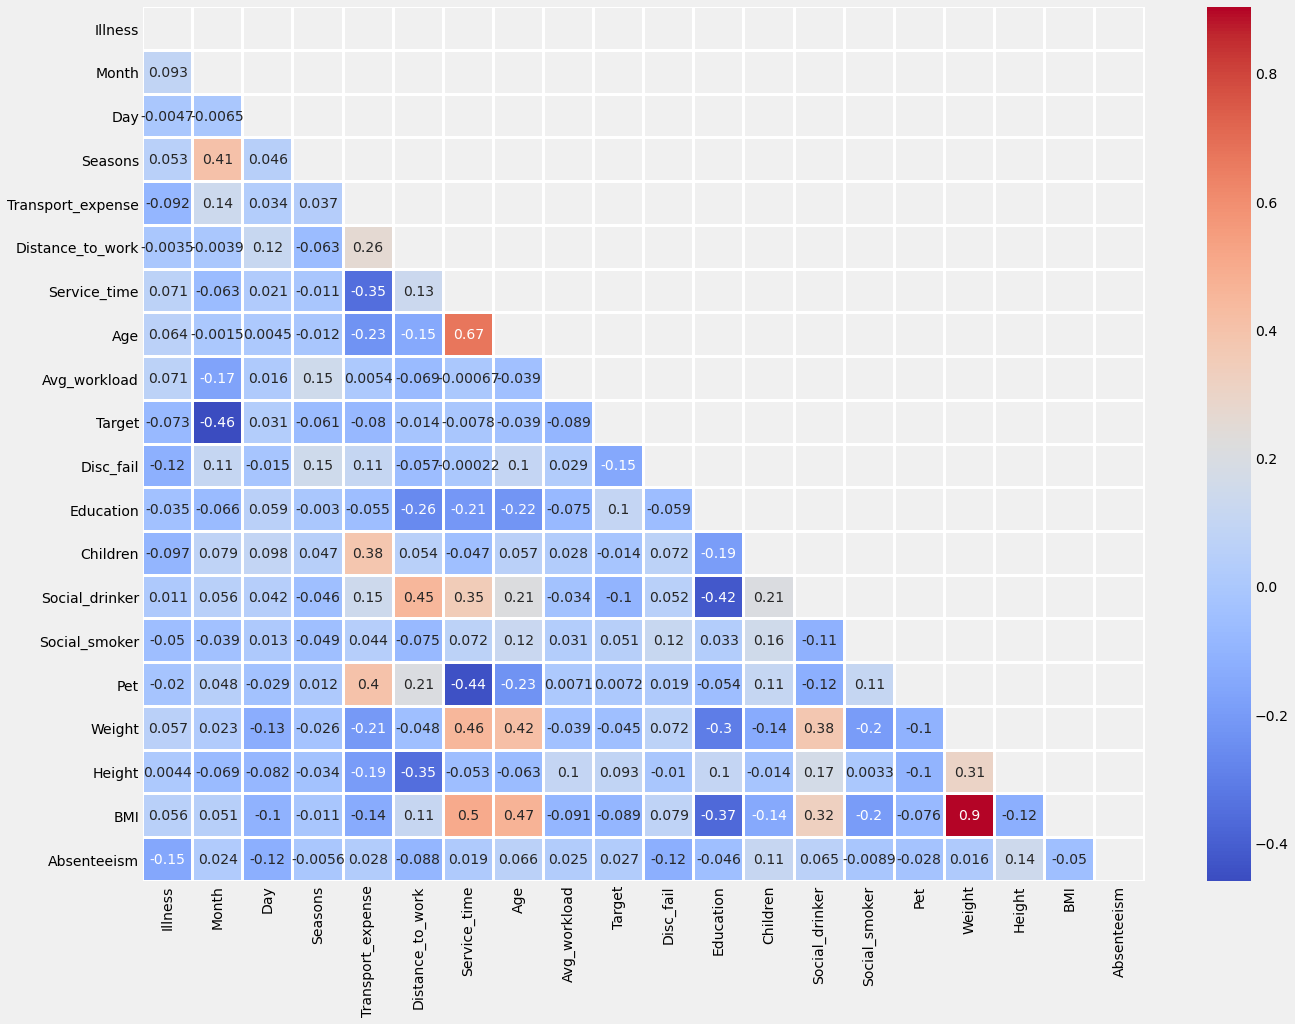

In [149]:
mask = np.zeros_like(corr_all, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,15))
sns.heatmap(corr_all, mask = mask, linewidths=2, cmap='coolwarm', annot = True)

# Target Variable:  Absenteeism

In [150]:
data.Absenteeism.value_counts()

8      208
2      157
3      112
1       88
4       60
0       44
16      19
24      16
40       7
5        7
32       6
64       3
80       3
120      3
112      2
56       2
48       1
7        1
104      1
Name: Absenteeism, dtype: int64

In [151]:
data.Absenteeism.median()

3.0

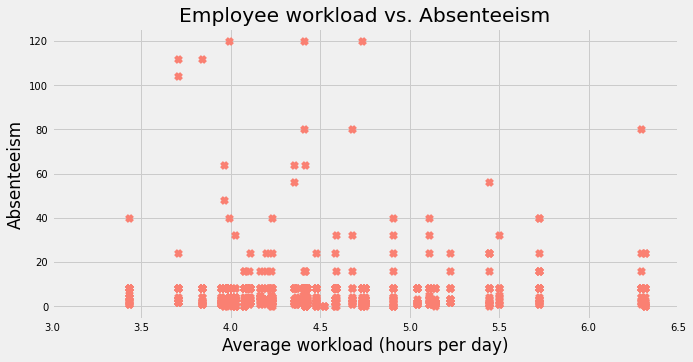

In [152]:
plt.scatter(data.Avg_workload, data.Absenteeism, color = 'salmon', marker = 'x')

plt.title('Employee workload vs. Absenteeism')
plt.xlabel('Average workload (hours per day)')
plt.ylabel('Absenteeism')

rcParams['figure.figsize'] = 10,5
plt.xlim([3, 6.5])

plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.rcParams['grid.color'] = 'gray'

plt.show()

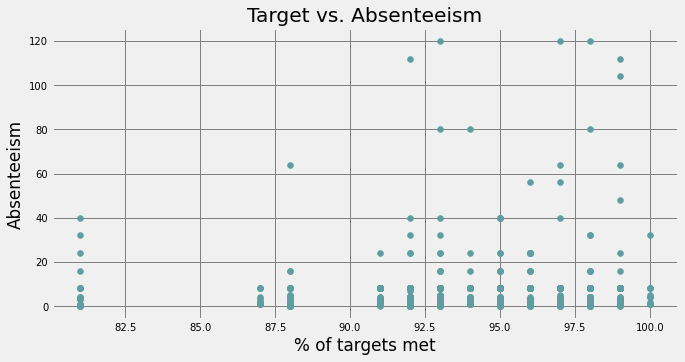

In [153]:
plt.scatter(data.Target, data.Absenteeism, color = 'cadetblue', marker = 'o')
plt.title('Target vs. Absenteeism')
plt.xlabel('% of targets met')
plt.ylabel('Absenteeism')

rcParams['figure.figsize'] = 10,5

plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.rcParams['grid.color'] = 'gray'

plt.show()

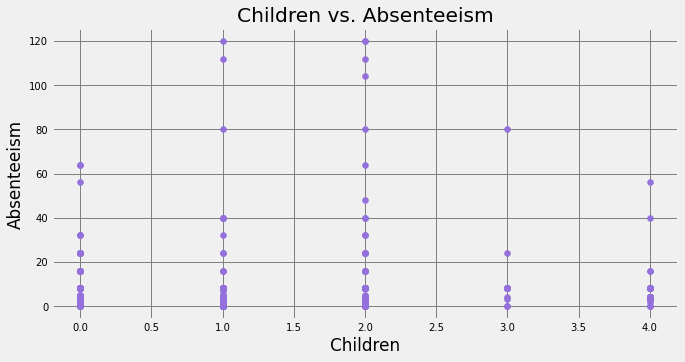

In [154]:
plt.scatter(data.Children, data.Absenteeism, color = 'mediumpurple')
plt.title('Children vs. Absenteeism')
plt.xlabel('Children')
plt.ylabel('Absenteeism')

rcParams['figure.figsize'] = 10,5

plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.rcParams['grid.color'] = 'gray'

plt.show()

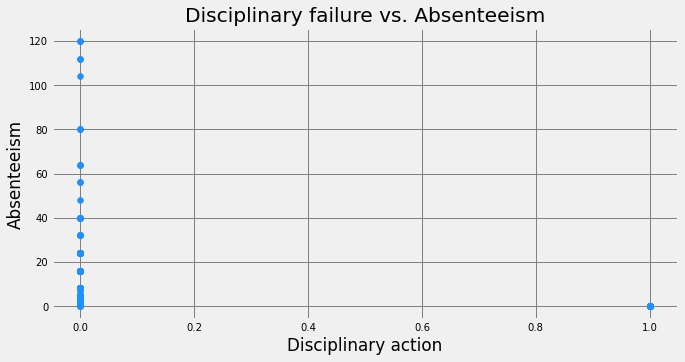

In [155]:
plt.scatter(data.Disc_fail, data.Absenteeism, color = 'dodgerblue')
plt.title('Disciplinary failure vs. Absenteeism')
plt.xlabel('Disciplinary action')
plt.ylabel('Absenteeism')

rcParams['figure.figsize'] = 10,5

plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.rcParams['grid.color'] = 'gray'

plt.show()

Text(0, 0.5, 'Absenteeism')

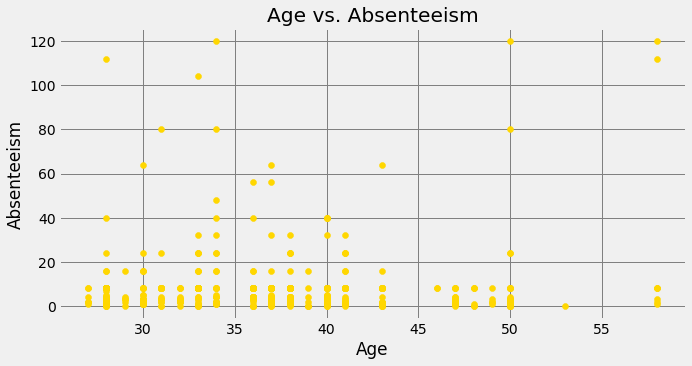

In [156]:
plt.scatter(data.Age, data.Absenteeism, color = 'gold')
plt.title('Age vs. Absenteeism')
plt.xlabel('Age')
plt.ylabel('Absenteeism')

In [157]:
data.Absenteeism.value_counts()

8      208
2      157
3      112
1       88
4       60
0       44
16      19
24      16
40       7
5        7
32       6
64       3
80       3
120      3
112      2
56       2
48       1
7        1
104      1
Name: Absenteeism, dtype: int64

Text(0.5, 0, 'Number of days')

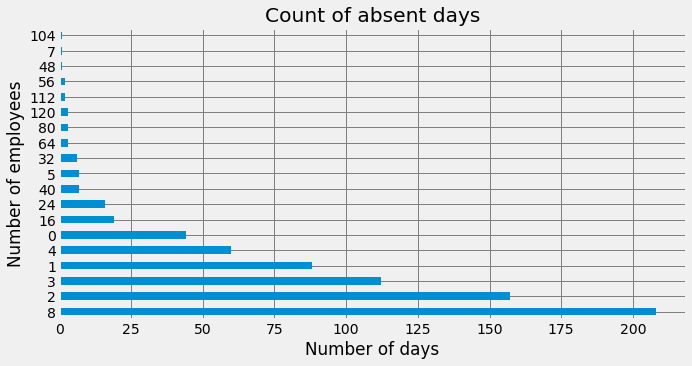

In [158]:
data['Absenteeism'].value_counts()[:].plot(kind='barh')
plt.title('Count of absent days')
plt.ylabel('Number of employees')
plt.xlabel('Number of days')

In [159]:
#Splitting by median to reach two categories
mask_good = data.Absenteeism <= 3
data.loc[mask_good, 'Absenteeism'] = 0
mask_bad = data.Absenteeism > 3
data.loc[mask_bad, 'Absenteeism'] = 1

data.head()

Illness  Month  Day  Seasons  Transport_expense  Distance_to_work  \
ID                                                                      
11        1      7    3        1                289                36   
36        0      7    3        1                118                13   
3         1      7    4        1                179                51   
7         1      7    5        1                279                 5   
11        1      7    5        1                289                36   

    Service_time  Age  Avg_workload  Target  Disc_fail  Education  Children  \
ID                                                                            
11            13   33      3.992567      97          0          1         2   
36            18   50      3.992567      97          1          1         1   
3             18   38      3.992567      97          0          1         0   
7             14   39      3.992567      97          0          1         2   
11            13   33      3.992567      97          0          1         2   

    Social_drinker  Social_smoker  Pet  Weight  Height  BMI  Absenteeism  
ID                                                                        
11               1              0    1      90     172   30            1  
36               1              0    0      98     178   31            0  
3                1              0    0      89     170   31            0  
7                1              1    0      68     168   24            1  
11               1              0    1      90     172   30            0

In [160]:
data.Absenteeism.shape

(740,)

Text(0, 0.5, 'Count')

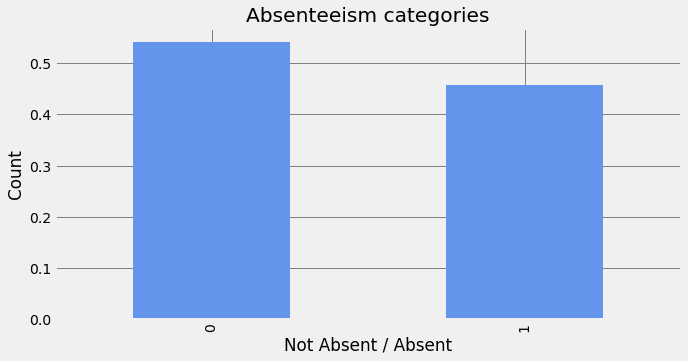

In [161]:
data.Absenteeism.value_counts(normalize = True).plot(kind='bar', color = 'cornflowerblue')
plt.title('Absenteeism categories')
plt.xlabel('Not Absent / Absent')
plt.ylabel('Count')

In [162]:
y = data.Absenteeism

## Predictor columns (X)

Removing those columns that are private to an employee and have low correlation to target (and that an employer cannot control or influence).

In [163]:
data.drop(['Weight'], axis = 1, inplace = True)
data.drop(['Height'], axis = 1, inplace = True)
data.drop(['BMI'], axis = 1, inplace = True)
data.drop(['Social_smoker'], axis = 1, inplace = True)
data.drop(['Social_drinker'], axis = 1, inplace = True)
data.drop(['Seasons'], axis = 1, inplace = True)
data.drop(['Day'], axis = 1, inplace = True)
data.drop(['Education'], axis = 1, inplace = True)
data.drop(['Pet'], axis = 1, inplace = True)

#### Note: While an employer can no control over whether an employee has children, it is likely that someone that is a caregiver for another person may require absence from work.

In [164]:
predictor_info = [col for col in data.columns if col!= 'Absenteeism']
X = pd.DataFrame(data, columns = predictor_info)

### Standardising the data

In [165]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

### Feature correlations

In [166]:
Xcorr = data.corr()

<AxesSubplot:>

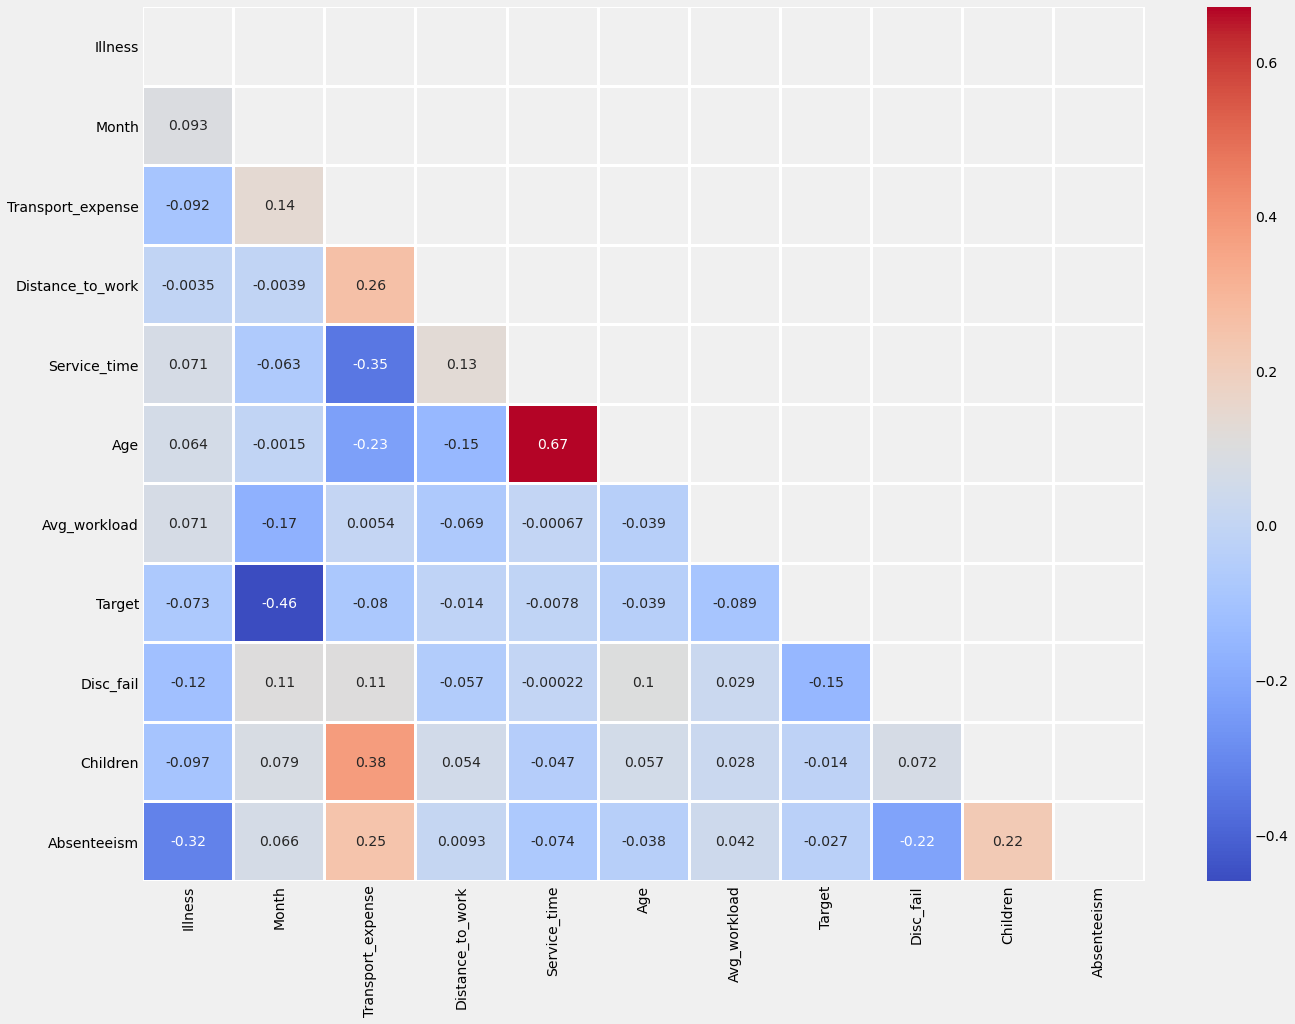

In [167]:
mask = np.zeros_like(Xcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,15))
sns.heatmap(Xcorr, mask = mask, linewidths=2, cmap='coolwarm', annot = True)

In [168]:
Absenteeism_corr = data[data.columns[:]].corr()['Absenteeism'][:]
Absenteeism_corr.sort_values(ascending = False)

Absenteeism          1.000000
Transport_expense    0.246761
Children             0.223815
Month                0.066388
Avg_workload         0.041579
Distance_to_work     0.009341
Target              -0.027488
Age                 -0.037933
Service_time        -0.074167
Disc_fail           -0.219790
Illness             -0.316715
Name: Absenteeism, dtype: float64

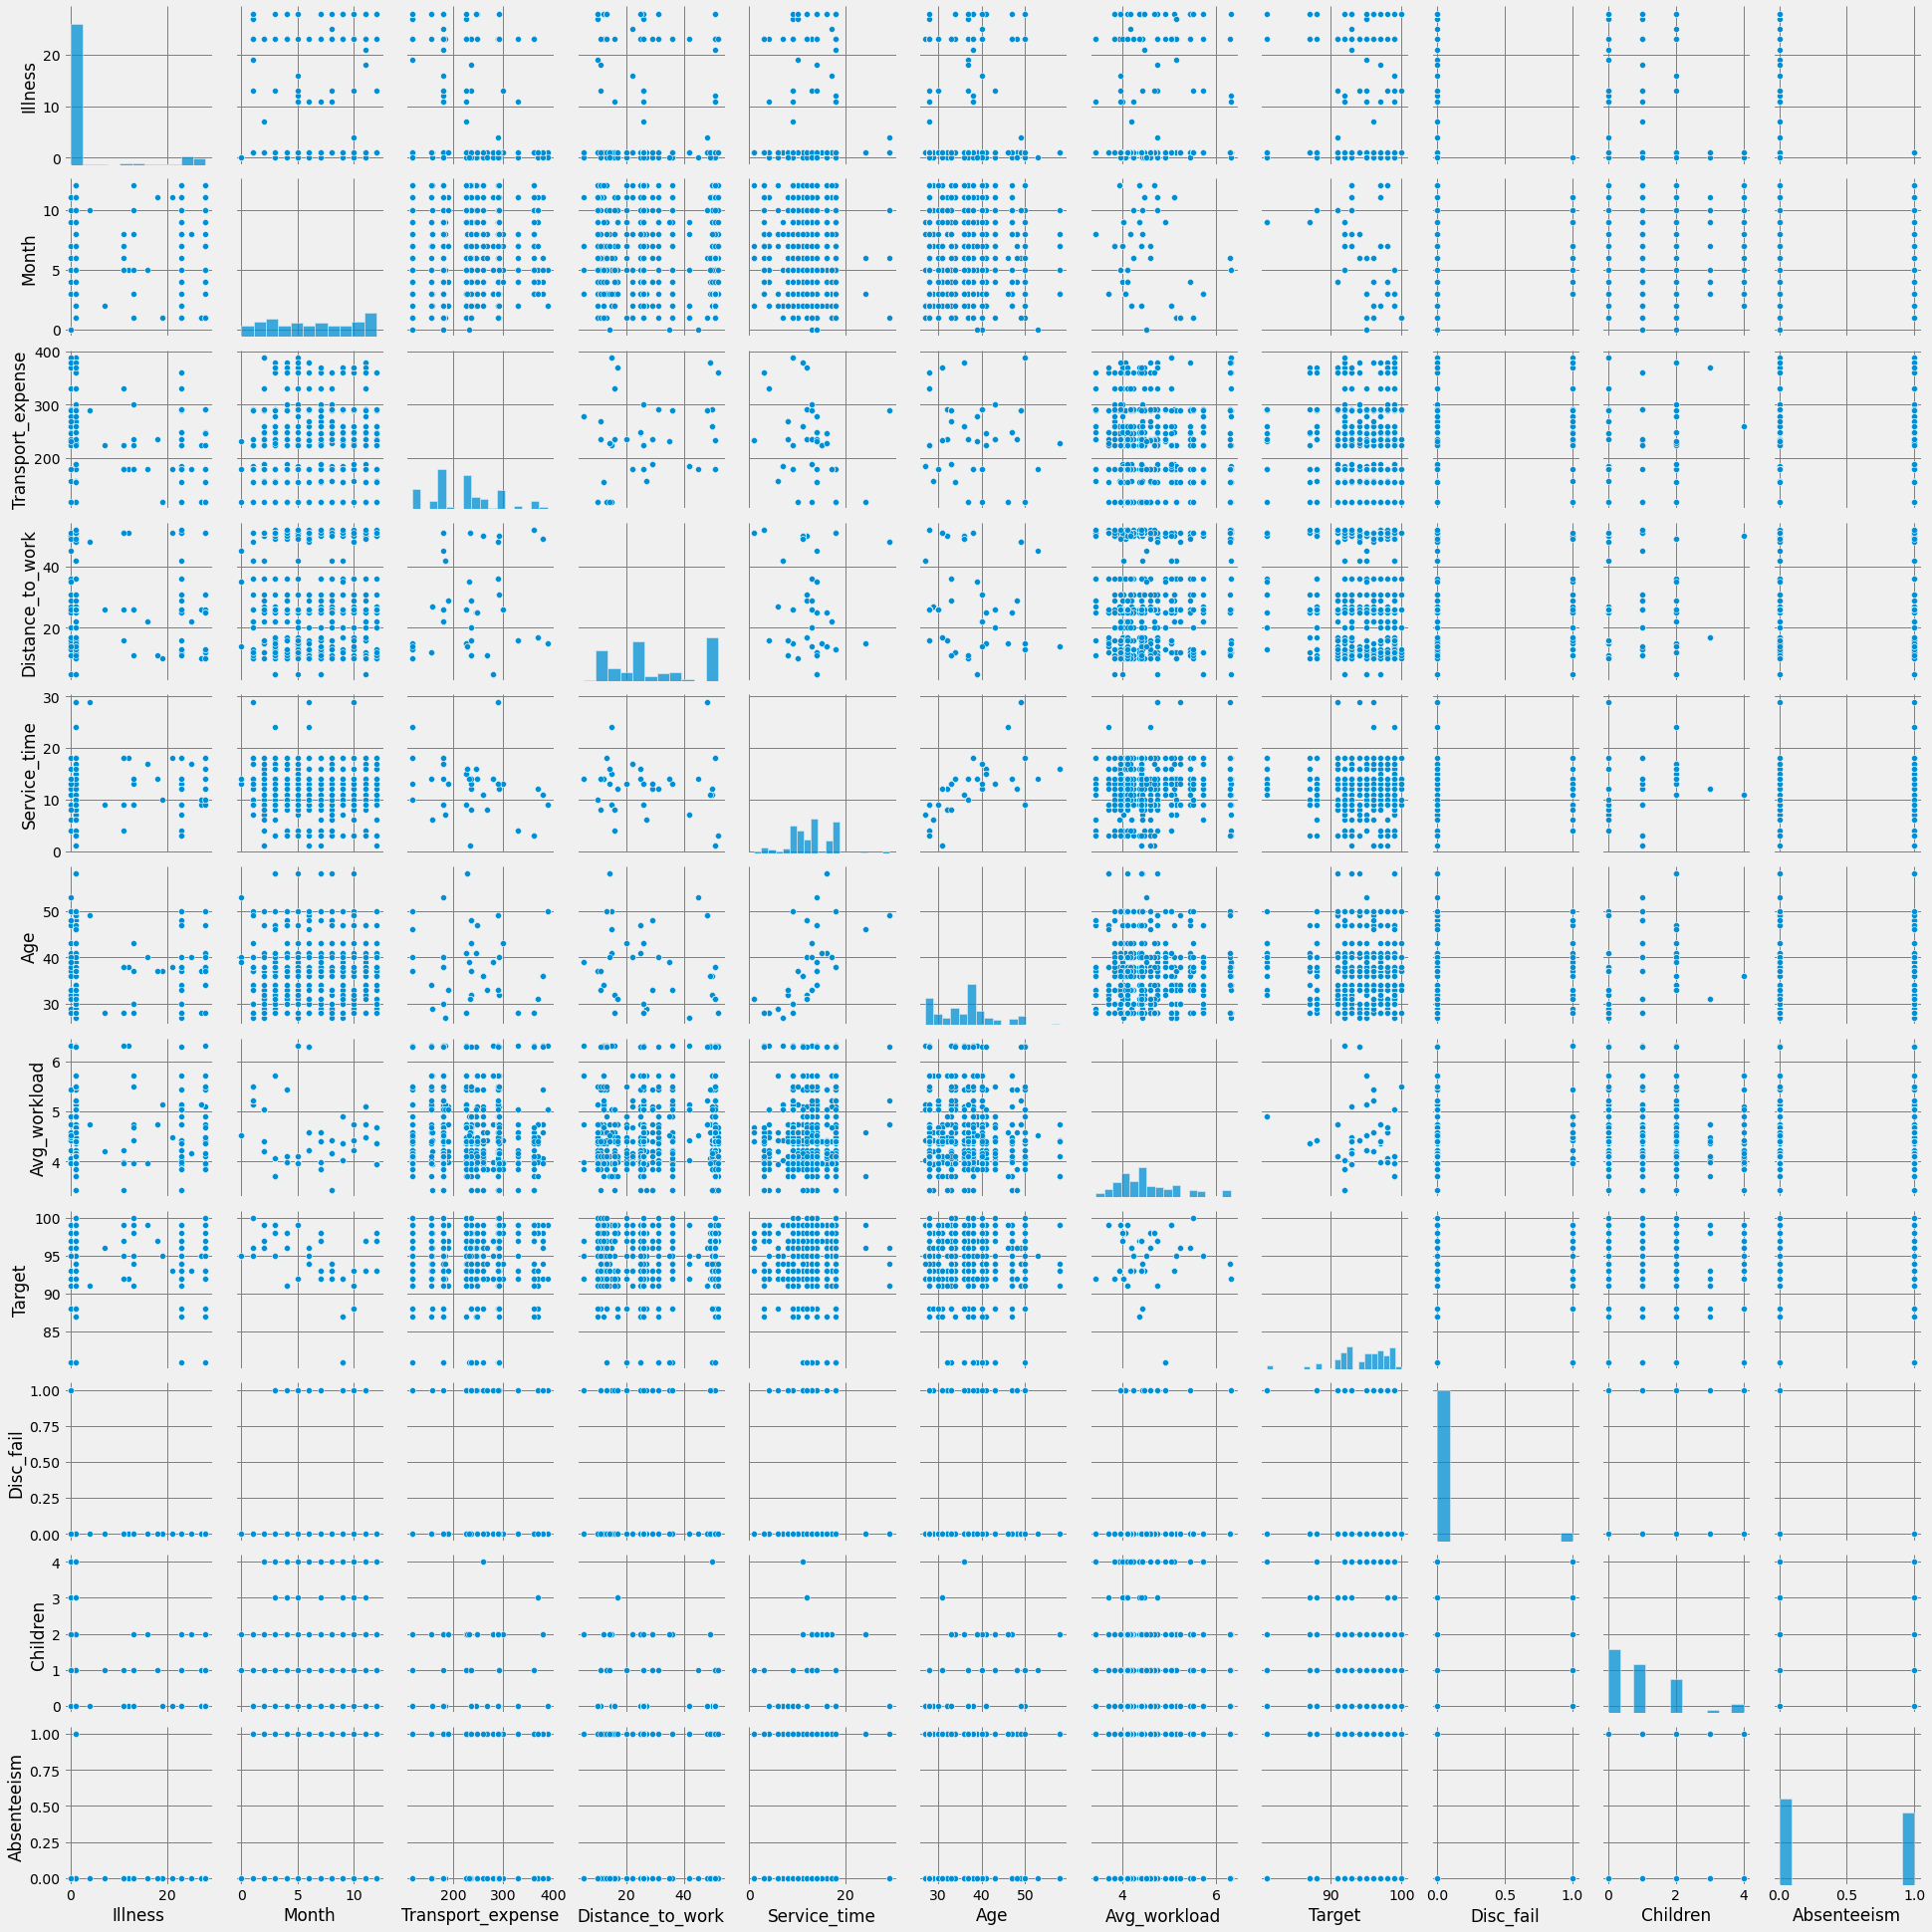

In [170]:
sns.pairplot(data)

### Train/Test split

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50, stratify=y)

## Regression models

#### Logistic Regression

Accuracy is:  0.7567567567567568
              precision    recall  f1-score   support

           0       0.81      0.71      0.76        80
           1       0.71      0.81      0.75        68

    accuracy                           0.76       148
   macro avg       0.76      0.76      0.76       148
weighted avg       0.76      0.76      0.76       148



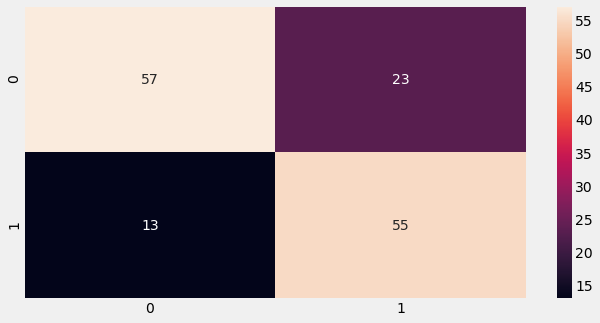

In [172]:
logreg_model = LogisticRegression(solver='liblinear')
logreg_model.fit(X_train, y_train)
logreg_model.score(X_train, y_train)
logreg_model.score(X_test, y_test)

logreg_yhat = logreg_model.predict(X_test)

ac_logreg = accuracy_score(y_test, logreg_yhat)

print('Accuracy is: ', ac_logreg)

logreg_y_pp = logreg_model.predict_proba(X_test)

cm= confusion_matrix(y_test, logreg_yhat)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report (y_test, logreg_yhat))

#### Naive Bayes

Accuracy is:  0.6283783783783784
              precision    recall  f1-score   support

           0       1.00      0.31      0.48        80
           1       0.55      1.00      0.71        68

    accuracy                           0.63       148
   macro avg       0.78      0.66      0.59       148
weighted avg       0.79      0.63      0.58       148



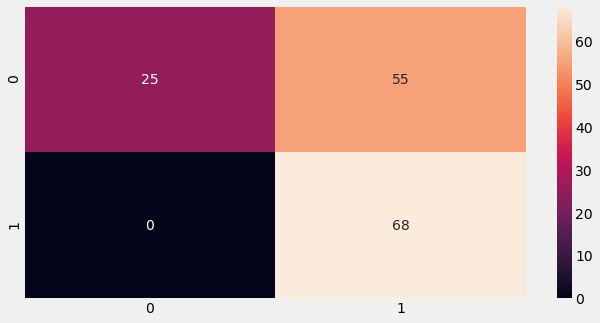

In [173]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_model.score(X_test, y_test)

nb_yhat = nb_model.predict(X_test)
ac_nb = accuracy_score(y_test, nb_yhat)
print('Accuracy is: ', ac_nb)

nb_y_pp = nb_model.predict_proba(X_test)

cm= confusion_matrix(y_test, nb_yhat)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report (y_test, nb_yhat))

#### SVC

Accuracy is:  0.75
              precision    recall  f1-score   support

           0       0.81      0.70      0.75        80
           1       0.70      0.81      0.75        68

    accuracy                           0.75       148
   macro avg       0.75      0.75      0.75       148
weighted avg       0.76      0.75      0.75       148



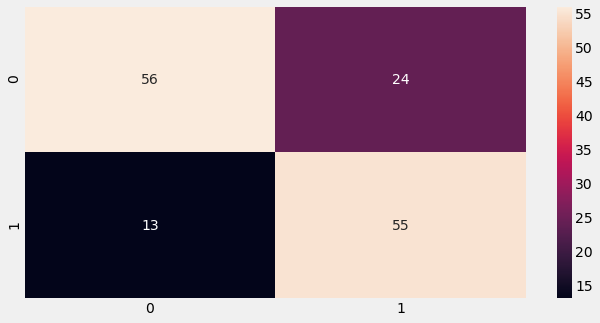

In [174]:
svc_model = SVC(kernel='linear', probability=True)
svc_model.fit(X_train, y_train)
svc_model.score(X_test, y_test)

svc_yhat = svc_model.predict(X_test)
ac_svc = accuracy_score(y_test, svc_yhat)
print('Accuracy is: ', ac_svc)

svc_y_pp = svc_model.predict_proba(X_test)

cm= confusion_matrix(y_test, svc_yhat)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report (y_test, svc_yhat))

#### XGBoost

C:\Users\carls\anaconda3\envs\Python\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:25:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 77.03%
              precision    recall  f1-score   support

           0       0.78      0.80      0.79        80
           1       0.76      0.74      0.75        68

    accuracy                           0.77       148
   macro avg       0.77      0.77      0.77       148
weighted avg       0.77      0.77      0.77       148



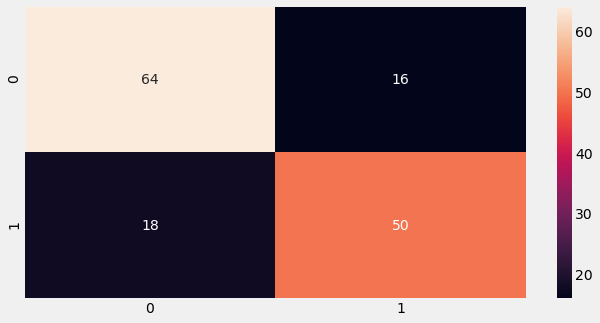

In [175]:
xgb_model = XGBClassifier()

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report (y_test, y_pred))

### Cross validation

##### Logistic Regression

In [176]:
cross_val_score(logreg_model, X, y, cv=5, scoring='accuracy').mean()

0.6905405405405405

##### Naive Bayes

In [177]:
cross_val_score(nb_model, X, y, cv=5, scoring='accuracy').mean()

0.6351351351351351

##### SVC

In [178]:
cross_val_score(svc_model, X, y, cv=5, scoring='accuracy').mean()

0.6905405405405405

##### XGBoost (Extreme Gradient Boosting)

In [179]:
cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy').mean()

C:\Users\carls\anaconda3\envs\Python\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:26:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:26:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:26:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:26:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

0.6824324324324323

### Gridsearch

#### Logisitc Regression

In [180]:
lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}
lr_gs = GridSearchCV(estimator = LogisticRegression(), param_grid = lr_params, cv=5, verbose=1, n_jobs=-1)
lr_gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.6s finished
C:\Users\carls\anaconda3\envs\Python\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'penalty': ['l1', 'l2']},
             verbose=1)

In [181]:
best_lr = lr_gs.best_estimator_
print(lr_gs.best_params_)
print(lr_gs.best_score_)

{'C': 1, 'penalty': 'l2'}
0.6851351351351351


#### SVC

In [182]:
svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}

svc_gs = GridSearchCV(SVC(probability=True), svc_params, cv=5, verbose=1, n_jobs=-1)
svc_gs.fit(X, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  7.6min finished


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'gamma': [0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             verbose=1)

In [183]:
best_svc = svc_gs.best_estimator_
print(svc_gs.best_params_)
print(svc_gs.best_score_)

{'C': 100, 'gamma': 0.001, 'kernel': 'linear'}
0.7027027027027029


## ROC/AUC curve (regression models)

In [184]:
yhat_pp_logreg = logreg_model.predict_proba(X_test)
yhat_pp_svc = svc_model.predict_proba(X_test)
yhat_pp_nb = nb_model.predict_proba(X_test)
yhat_pp_xgb = xgb_model.predict_proba(X_test)

In [185]:
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, yhat_pp_logreg[:,1])
fpr_svc, tpr_svc, _ = roc_curve(y_test, yhat_pp_svc[:,1])
fpr_nb, tpr_nb, _ = roc_curve(y_test, yhat_pp_nb[:,1])
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, yhat_pp_xgb[:,1])

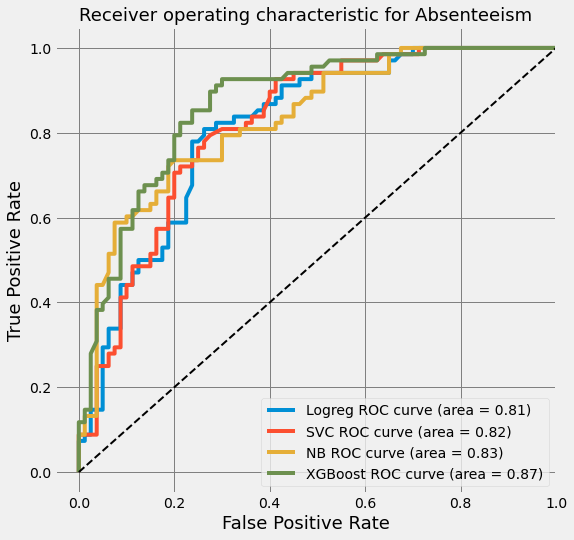

In [186]:
plt.figure(figsize=[8,8])

plt.plot(fpr_logreg, tpr_logreg, label='Logreg ROC curve (area = %0.2f)' % auc(fpr_logreg, tpr_logreg), linewidth=4)
plt.plot(fpr_svc, tpr_svc, label='SVC ROC curve (area = %0.2f)' % auc(fpr_svc, tpr_svc), linewidth=4)
plt.plot(fpr_nb, tpr_nb, label='NB ROC curve (area = %0.2f)' % auc(fpr_nb, tpr_nb), linewidth=4)
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost ROC curve (area = %0.2f)' % auc(fpr_xgb, tpr_xgb), linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for Absenteeism', fontsize=18)
plt.legend(loc="lower right")
plt.show()

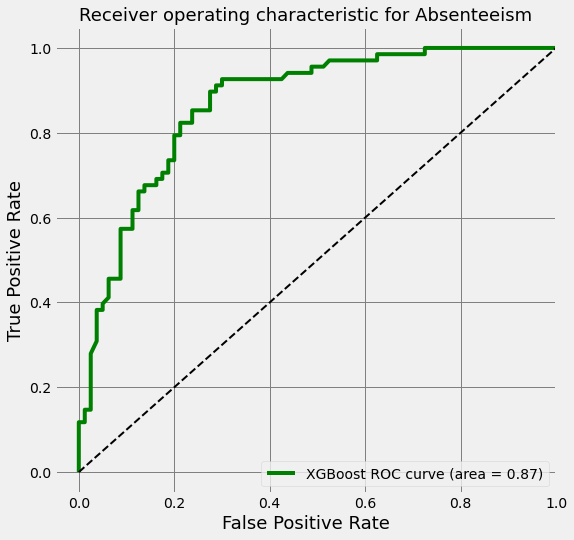

In [187]:
yhat_pp_xgb = xgb_model.predict_proba(X_test)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, yhat_pp_xgb[:,1])

plt.figure(figsize=[8,8])

plt.plot(fpr_xgb, tpr_xgb, label='XGBoost ROC curve (area = %0.2f)' % auc(fpr_xgb, tpr_xgb), linewidth=4, color = 'green')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for Absenteeism', fontsize=18)
plt.legend(loc="lower right")
plt.show()

## Decision tree (9 features)

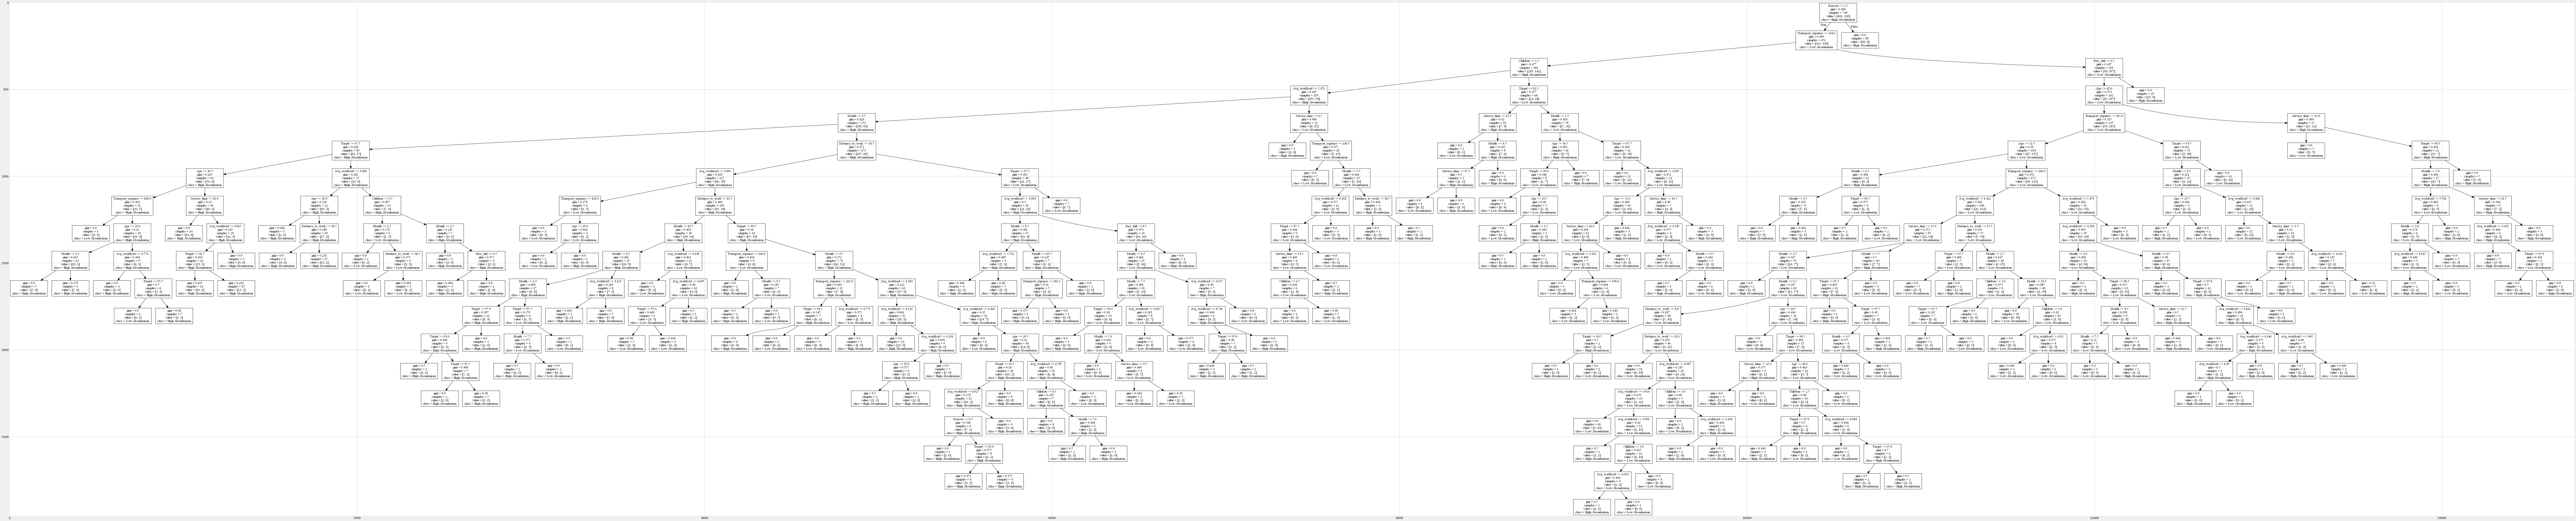

In [73]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)
feature_names=['Reason', 'Month','Transport_expense','Distance_to_work', 'Service_time', 'Age', 'Avg_workload', 'Target','Disc_fail', 'Children']
class_names = ['High Absenteeism', 'Low Absenteeism']
plt.figure(figsize=(200,200))

data = tree.export_graphviz(dtree, out_file=None, feature_names=feature_names, class_names = class_names)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()